In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('wine.data.csv')

In [3]:
dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X = dataset.iloc[:, [3,4]].values

In [5]:
X

array([[ 2.43, 15.6 ],
       [ 2.14, 11.2 ],
       [ 2.67, 18.6 ],
       [ 2.5 , 16.8 ],
       [ 2.87, 21.  ],
       [ 2.45, 15.2 ],
       [ 2.45, 14.6 ],
       [ 2.61, 17.6 ],
       [ 2.17, 14.  ],
       [ 2.27, 16.  ],
       [ 2.3 , 18.  ],
       [ 2.32, 16.8 ],
       [ 2.41, 16.  ],
       [ 2.39, 11.4 ],
       [ 2.38, 12.  ],
       [ 2.7 , 17.2 ],
       [ 2.72, 20.  ],
       [ 2.62, 20.  ],
       [ 2.48, 16.5 ],
       [ 2.56, 15.2 ],
       [ 2.28, 16.  ],
       [ 2.65, 18.6 ],
       [ 2.36, 16.6 ],
       [ 2.52, 17.8 ],
       [ 2.61, 20.  ],
       [ 3.22, 25.  ],
       [ 2.62, 16.1 ],
       [ 2.14, 17.  ],
       [ 2.8 , 19.4 ],
       [ 2.21, 16.  ],
       [ 2.7 , 22.5 ],
       [ 2.36, 19.1 ],
       [ 2.36, 17.2 ],
       [ 2.7 , 19.5 ],
       [ 2.65, 19.  ],
       [ 2.41, 20.5 ],
       [ 2.84, 15.5 ],
       [ 2.55, 18.  ],
       [ 2.1 , 15.5 ],
       [ 2.51, 13.2 ],
       [ 2.31, 16.2 ],
       [ 2.12, 18.8 ],
       [ 2.59, 15.  ],
       [ 2.

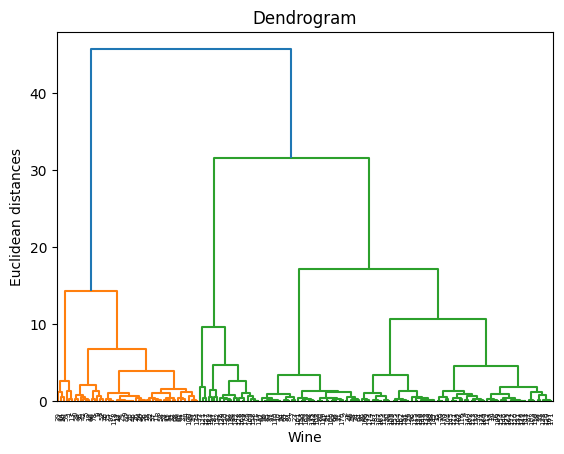

In [6]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(X, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =6, affinity ='euclidean', linkage ='ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
print(y_hc)

[1 4 3 1 2 1 1 3 1 1 3 1 1 4 4 1 2 2 1 1 1 3 1 3 2 0 1 1 2 1 5 3 1 2 3 2 1
 3 1 4 1 3 1 1 1 3 1 1 3 1 4 1 1 1 1 2 1 1 1 4 1 1 3 3 3 3 1 2 1 1 2 0 0 0
 2 1 1 3 1 5 3 3 0 5 3 3 5 0 5 0 3 5 2 3 3 3 5 1 3 3 1 3 2 2 2 5 3 5 3 2 2
 2 2 2 5 5 2 5 1 3 2 0 0 5 2 2 5 0 0 5 3 2 0 5 1 3 2 0 2 0 2 2 0 2 3 2 2 5
 5 5 0 5 0 3 2 5 2 0 0 5 2 2 5 3 5 5 5 2 0 0 3 2 2 2 5 2 2 0]


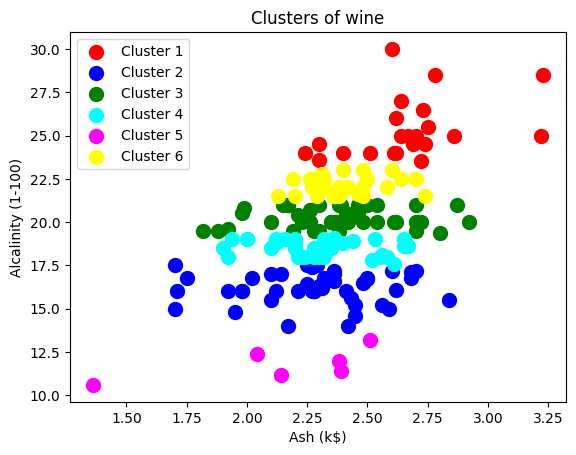

In [12]:
plt.scatter(X[y_hc ==0,0], X[y_hc ==0,1], s =100, c ='red', label ='Cluster 1')
plt.scatter(X[y_hc ==1,0], X[y_hc ==1,1], s =100, c ='blue', label ='Cluster 2')
plt.scatter(X[y_hc ==2,0], X[y_hc ==2,1], s =100, c ='green', label ='Cluster 3')
plt.scatter(X[y_hc ==3,0], X[y_hc ==3,1], s =100, c ='cyan', label ='Cluster 4')
plt.scatter(X[y_hc ==4,0], X[y_hc ==4,1], s =100, c ='magenta', label ='Cluster 5')
plt.scatter(X[y_hc ==5,0], X[y_hc ==5,1], s =100, c ='yellow', label ='Cluster 6')
plt.title('Clusters of wine')
plt.xlabel('Ash (k$)')
plt.ylabel('Alcalinity (1-100)')
plt.legend()
plt.show()